In [29]:
import numpy as np

In [31]:
import matplotlib.pyplot as plt

In [33]:
import math

In [66]:
# Построить график стационарного процесса {h_n} и график волатильности {sigma_n} процесса GARCH(1,0), n=1000 наблюдений
def GARCH(ab, h_sigma ,n, p, q):
    h = h_sigma[0]
    sigma = h_sigma[1]
    
    for k in range(0,n):
        sum_q = 0
        sum_p = 0
        for i in range(1,p+1):
            sum_p = sum_p + ab[0][i]*(h[k+p-i]*h[k+p-i])
        for j in range(1,q+1):
            sum_q = sum_q + ab[1][j]*(sigma[k+q-j])
        sigma.insert(k+p,ab[0][0] + sum_p + sum_q)
        h.insert(k+p,(math.sqrt(sigma[k+p]))*np.random.normal(0, 1, 1)[0]) 
    vector = [h[p:],sigma[p:]]
    return vector
        

Text(0.5, 1.0, 'sigma')

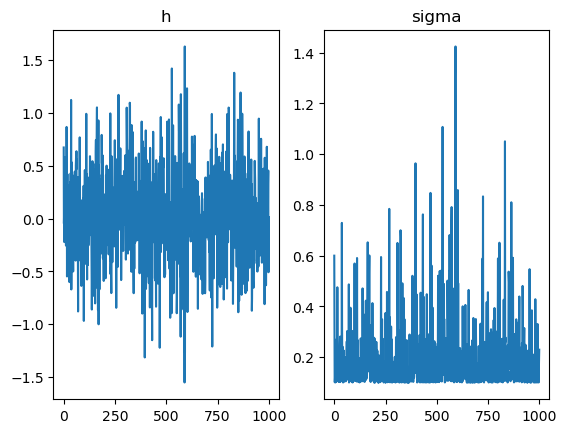

In [68]:
ab = [[0.1,0.5] # параметры a0 и a1
      ,[0,0]]  # заполнитель и параметр b1 = ab[1][1], в данном случае просто заглушки
h_sigma = [[1], # начальное значение h_0
           [1]] # sigma_0
x = GARCH(ab, h_sigma, 1000, 1, 0)
figure, axis = plt.subplots(1, 2)
axis[0].plot(x[0])
axis[0].set_title("h")
axis[1].plot(x[1])
axis[1].set_title("sigma")

In [70]:
# Оценить параметры a0 и a1 с помощью метода наименьших квадратов (МНК), путем преобразования процесса ARCH(1)≡GARCH(1,0) к
# процессу авторегрессии первого порядка.

In [72]:
def a_fit(h):
    sum_1 = 0
    sum_2 = 0
    sum_3 = 0
    sum_4 = 0
    for k in range(1, len(h)):   
        sum_1 = sum_1 + (h[k]**2)*(h[k-1]**2)
        sum_2 = sum_2 + h[k]**2
        sum_3 = sum_3 + h[k-1]**2
        sum_4 = sum_4 + h[k-1]**4
    a1 = -(sum_1 - sum_2*sum_3/(len(h)))/((sum_3*sum_3)/(len(h)) - sum_4)
    return [(sum_2-a1*sum_3)/(len(h)), a1]

In [74]:
ab = [[0.1,0.5] # параметры a0 и a1
      ,[0,0]]  # заполнитель и параметр b1 = ab[1][1]
h_sigma = [[1], # начальное значение h_0
           [0.1]] # sigma_0
x = GARCH(ab, h_sigma, 1000, 1, 0)

print("a0 , a1 -> ", a_fit(x[0]))

a0 , a1 ->  [0.12808055127352216, 0.4348563622654755]


In [76]:
# Оценить параметры a0 a1 при помощи функции garch() пакета tseries по
# выборке {hn}.
# в данном случае оцениваем с помощью arch, параметр омега это a0
import numpy as np
import pandas as pd
from arch import arch_model

# Пример данных (например, случайные данные)

ab = [[0.2,0.7],[0,0]] # a0 = 0.2  a1 = 0.7
h_sigma = [[0.5],[0.5]] # начальные параметры
x = GARCH(ab, h_sigma, 1000, 1, 0)
# Создание модели GARCH(1, 0)
model = arch_model(x[0], vol='Garch', p=1, q=0)

# Оценка модели
results = model.fit()

# Вывод параметров модели
print(results.params) 


Iteration:      1,   Func. Count:      5,   Neg. LLF: 3036.1044225702067
Iteration:      2,   Func. Count:     12,   Neg. LLF: 3485.4628780859593
Iteration:      3,   Func. Count:     19,   Neg. LLF: 2056.0572545240757
Iteration:      4,   Func. Count:     24,   Neg. LLF: 939.4265602476185
Iteration:      5,   Func. Count:     29,   Neg. LLF: 904.742187425434
Iteration:      6,   Func. Count:     33,   Neg. LLF: 904.6214149530783
Iteration:      7,   Func. Count:     37,   Neg. LLF: 904.5974758867935
Iteration:      8,   Func. Count:     41,   Neg. LLF: 904.5964588471295
Iteration:      9,   Func. Count:     45,   Neg. LLF: 904.59644898253
Iteration:     10,   Func. Count:     48,   Neg. LLF: 904.596448982511
Optimization terminated successfully    (Exit mode 0)
            Current function value: 904.59644898253
            Iterations: 10
            Function evaluations: 48
            Gradient evaluations: 10
mu          0.000202
omega       0.220304
alpha[1]    0.492566
Name: param

Iteration:      1,   Func. Count:      7,   Neg. LLF: 4179.229466967669
Iteration:      2,   Func. Count:     16,   Neg. LLF: 2815.416550491536
Iteration:      3,   Func. Count:     25,   Neg. LLF: 3395.8352451126775
Iteration:      4,   Func. Count:     32,   Neg. LLF: 2832.51912411983
Iteration:      5,   Func. Count:     39,   Neg. LLF: 3100.8049190793854
Iteration:      6,   Func. Count:     46,   Neg. LLF: 4419.8008147633545
Iteration:      7,   Func. Count:     53,   Neg. LLF: 1070.9804868812566
Iteration:      8,   Func. Count:     60,   Neg. LLF: 1329.4308934693863
Iteration:      9,   Func. Count:     67,   Neg. LLF: 1064.6291317488676
Iteration:     10,   Func. Count:     74,   Neg. LLF: 1150.097798191604
Iteration:     11,   Func. Count:     81,   Neg. LLF: 1049.3194531180645
Iteration:     12,   Func. Count:     88,   Neg. LLF: 1044.7875166708964
Iteration:     13,   Func. Count:     94,   Neg. LLF: 1044.7657489853589
Iteration:     14,   Func. Count:    100,   Neg. LLF: 10

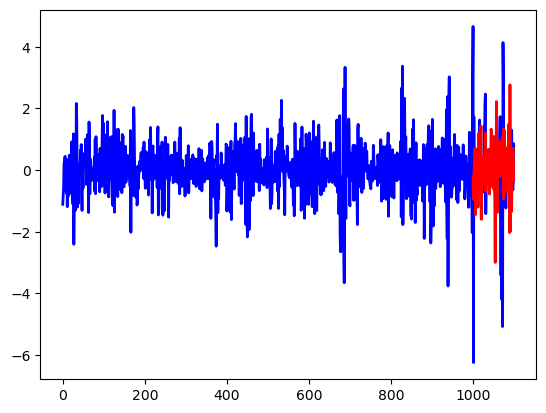

In [78]:
# Построить график стационарного процесса GARCH(30), из n = 1100
# наблюдений. Разделить процесс на обучающую и тестовую выборки в от
# ношении 10:1. Оценить вектор параметров (a0 a1 a2 a3)′ на обучающей
# выборке, используя функцию garch(). Затем вычислить последователь
# ность прогнозов на 1 шаг {hn+1|n} на тестовой выборке и наложить про
# гнозы на график модулей процесса.

ab = [[0.2,0.4,0.3,0.1],[0,0,0,0]] # a0 = 0.2  a1 = 0.6
h_sigma = [[1,0.5,1],[1,0.3,0.7]]
x = GARCH(ab, h_sigma, 1100, 3, 0)
#x = [[element * 10 for element in sublist] for sublist in x]
training = x[0][:1000]
test = x[0][1000:]

model = arch_model(training, vol='Garch', p=3, q=0)

# Оценка модели
results = model.fit()

# Вывод параметров модели
print("Оценки параметров:")
print(results.params) 

ab = [[results.params['omega'],results.params['alpha[1]'],results.params['alpha[2]'],results.params['alpha[3]']],[0,0,0,0]]
training_sigma = x[1][:1000]
h_sigma = [training[(len(training)-3):], training_sigma[(len(training_sigma)-3):]] # теперь начальные данные берутся из тестовой выборки

result_test = GARCH(ab, h_sigma, 100, 3, 0) 

plt.plot( x[0], label='process', color='blue', linewidth=2)
plt.plot(range(1000,1100), result_test[0] , label='result_test', color='red', linewidth='2')


In [80]:
# Построить стационарный процесс GARCH(11), из n = 1000 наблюдений
# и оценить его параметры (a0 a1 b1)′ по выборке {hn}, используя функцию
# garch()
# оценка через arch
ab = [[0.1,0.5],[0,0.3]]
h_sigma = [[1],[1]]
x = GARCH(ab, h_sigma, 1000, 1, 1)

model = arch_model(x[0], vol='Garch', p=1, q=1)

# Оценка модели
results = model.fit()
print(results.params)

Iteration:      1,   Func. Count:      6,   Neg. LLF: 756162071661.841
Iteration:      2,   Func. Count:     15,   Neg. LLF: 552157544.9016774
Iteration:      3,   Func. Count:     22,   Neg. LLF: 1076.2362450191526
Iteration:      4,   Func. Count:     28,   Neg. LLF: 931.0866057928512
Iteration:      5,   Func. Count:     34,   Neg. LLF: 964.4375847631826
Iteration:      6,   Func. Count:     40,   Neg. LLF: 926.7821902962521
Iteration:      7,   Func. Count:     46,   Neg. LLF: 900.5515014961442
Iteration:      8,   Func. Count:     51,   Neg. LLF: 900.3823330450671
Iteration:      9,   Func. Count:     56,   Neg. LLF: 900.218898180397
Iteration:     10,   Func. Count:     61,   Neg. LLF: 900.1890139233668
Iteration:     11,   Func. Count:     66,   Neg. LLF: 900.1875701770049
Iteration:     12,   Func. Count:     71,   Neg. LLF: 900.187531159642
Iteration:     13,   Func. Count:     76,   Neg. LLF: 900.1875297124741
Iteration:     14,   Func. Count:     80,   Neg. LLF: 900.18752971